# **Rayan International AI Contest**

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 24px;'><strong>Machine Learning & Deep Learning Course </strong></font>

<font color='black' style='font-family: "Times New Roman", Times, serif; font-size: 20px;'><em>**Homework 1** || **Title**: Introduction to Machine Learning</em></font>


# Credit Card Fraud Detection

This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.



## Importing Libraries


In [2]:
!pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.cluster import KMeans
import cv2
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from lazypredict.Supervised import LazyClassifier
from imblearn.combine import SMOTEENN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Load Dataset

In [10]:
!pip install kaggle

     -------------------------------------- 82.7/82.7 kB 178.5 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105802 sha256=cc4cc0688fdfc255945ae00c926139c718818b8ab929c27b543ad6d8f43234c4
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\14\e4\0d\a3409c4d5ec4fcc54cdd5713cacfcdcff6125e9d5392d7cd92
Successfully built kaggle


In [1]:
# Dataset Link: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1/data

# from google.colab import files
# files.upload()

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d mojtabanafez/rayan-homework1


Dataset URL: https://www.kaggle.com/datasets/mojtabanafez/rayan-homework1
License(s): apache-2.0
403 - Forbidden


In [7]:
df = pd.read_csv('./creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,...,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,...,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,...,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,...,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,...,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [8]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']
print(f'df: {df.shape}\nX: {X.shape}\ny: {y.shape}')

df: (284807, 31)
X: (284807, 30)
y: (284807,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)



**Student Task:**
1. Check Summary Statistics for the Dataset
2. Visualize Distribution of Classes
3. Check Correlation Matrix
4. Plot the Distribution of Some Selected Features
5. Additional Analysis (Choose at Least 5)
    * Example: Data Visualization (After Dimension Reduction), Outlier Detection, Feature Engineering, Insightful Plots, ...

In [11]:
# ### 2.1 Summary Statistics
# Display summary statistics for the dataset

df.describe()

# pass

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


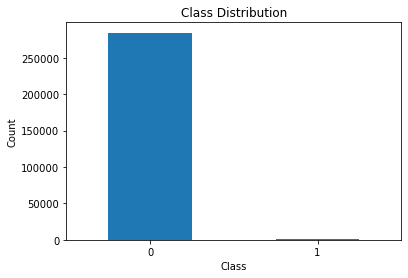

In [12]:
# ### 2.2 Class Distribution
# Visualize the class distribution

class_counts = df['Class'].value_counts()

plt.figure(figsize=(6 ,4))
class_counts.plot(kind='bar', rot=0)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.savefig('Class.png')
plt.show()

pass


In [13]:
# Calculate class distribution as percentages
class_percentages = df['Class'].value_counts(normalize=True) * 100
print(f'class Distribution: \n{class_percentages}')

pass

class Distribution: 
0   99.83
1    0.17
Name: Class, dtype: float64


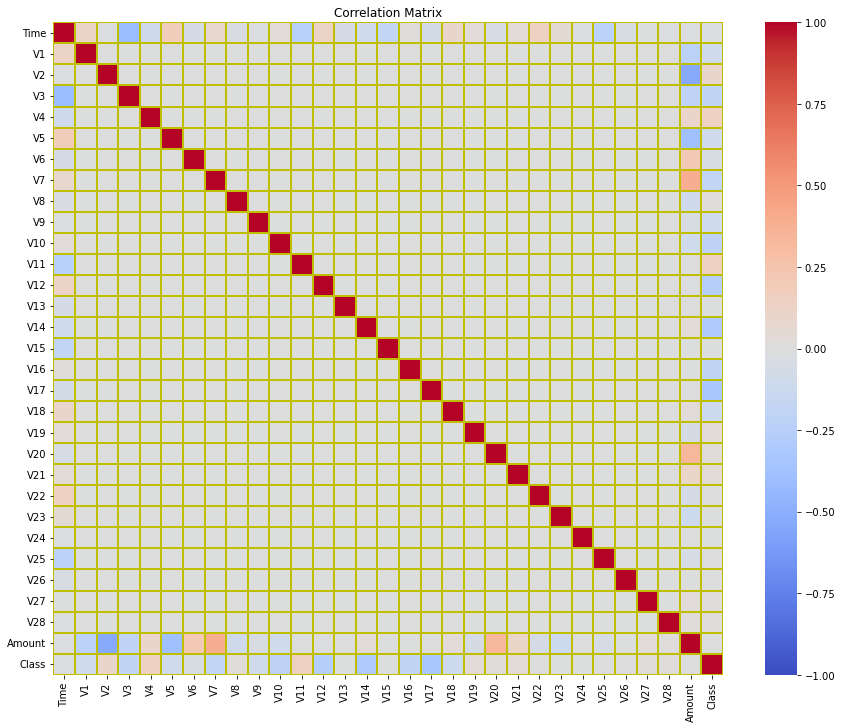

In [15]:
# ### 2.3 Correlation Matrix
# Compute the correlation matrix

corr_matrix  = df.corr()
plt.figure(figsize=(15, 12))

# sns.heatmap(corr_matrix, annot=False,cbar_ax = ?? ,cmap='coolwarm', vmin=-1, vmax=1)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linecolor='y', linewidths=0.1)

plt.title('Correlation Matrix')
plt.savefig('Correlation Matrix.png')
plt.show()

pass


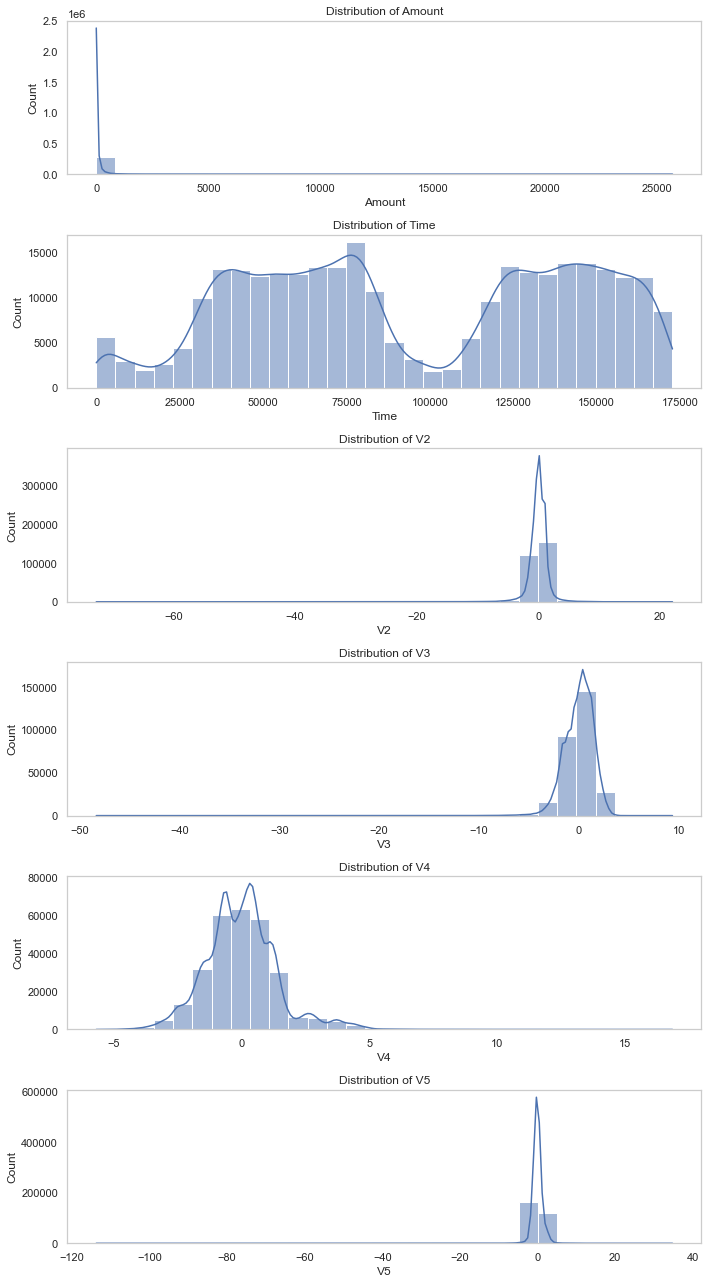

In [16]:
# ### 2.4 Feature Distributions
# Plot the distribution of a few selected features

# Set the style for the plots
sns.set(style='whitegrid')

# List of specific features you want to plot
features_to_plot = ['Amount', 'Time', 'V2', 'V3', 'V4', 'V5']

# Set the size of the overall plot
plt.figure(figsize=(10, 18))

# Plot each feature's distribution
for i, feature in enumerate(features_to_plot):
    plt.subplot(len(features_to_plot), 1, i + 1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(False)
    plt.title(f'Distribution of {feature}')

# Adjust layout
plt.tight_layout()

# Save the plot as a file
plt.savefig('Feature_Amount_Distributions.png')

# Display the plot
plt.show()

pass

In [17]:
##########################################################
### You can add more creative analysis to learn more...###
##########################################################
pass
##########################################################
##########################################################
##########################################################

In [18]:

corr_matrix = df.drop(columns=['Class']).corr()


## question

1. Describe at least two major challenges in the dataset based on your EDA findings:

Class imbalance:

Class 0 (non-counterfeit): 99.83%

Class 1 (fake): 0.17%

The Class column is highly unbalanced, meaning that the number of non-fraudulent transactions (0) far outnumbers fraudulent transactions (1), making fraud detection less accurate.
Uninterpretable: Contains features V1 to V28 that have been anonymized for privacy (possibly through techniques such as PCA). This makes it difficult to interpret the data and directly understand the significance of each feature.
Existence of anomalies: Existence of anomalies (outliers) in variables such as Amount and other features can be another challenge.

2. Analysis of the correlation matrix of features:

According to the correlation matrix, if two features have a direct relationship, they should be brought close to 1. And if you have no relationship, they are closer to 0, and if you have an inverse relationship, they are closer to -1.
Given that the matrix, it can be seen that there is this relationship:

Direct relation: (value, v7) ,...

no relation: (value, v3),...

Inverse relation: (value, v2),...

3. Is your data linearly separable? Please provide a logical reason:

No because, with data(284807, 31), with 30 attributes (in addition to the column class), the attribute space is very complex and high-featured. In such spaces, the ability to identify linear separation cannot be from two-dimensional space.


**Answer**.

## Data Preprocessing

Based on the challenges you've identified, recommend preprocessing methods to use during training to enhance model performance.

Some popular preprocessing techniques you can search about and learn include:

* Data Cleaning (Outlier Detection and Treatment, Handling Missing Values, ...)
* Data Transformation (Normalization, Standardization, ...)
* Feature Engineering (Feature Creation, Feature Selection, ...)
* Data Reduction (Dimensionality Reduction, Sampling, ...)
* Resampling Techniques (Oversampling or Undersampling)
* Handling Imbalanced Data
* ...


In [19]:
# missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [20]:
# Standardization

scaler = StandardScaler()
X_scaled_Std = scaler.fit_transform(X)
X_scaled_Std[2]

# pass

array([-1.99656197, -0.69350046, -0.81157783,  1.16946849,  0.26823129,
       -0.36457179,  1.35145359,  0.63977564,  0.20737273, -1.37867535,
        0.19069961,  0.61182971,  0.06613662,  0.72069985, -0.17311389,
        2.56290618, -3.29823537,  1.30686788, -0.14478999, -2.77856085,
        0.68097497,  0.3376317 ,  1.06335827,  1.45631975, -1.13809214,
       -0.62853672, -0.28844675, -0.13713686, -0.18102083,  1.16068593])

In [21]:
# Normalization

scaler = MinMaxScaler()
X_scaled_N = scaler.fit_transform(X)
X_scaled_N[3]
# pass

array([5.78730497e-06, 9.41878017e-01, 7.65303959e-01, 8.68483648e-01,
       2.13661222e-01, 7.65646900e-01, 2.75559237e-01, 2.66803055e-01,
       7.89434181e-01, 4.14999379e-01, 5.07585050e-01, 2.71817382e-01,
       7.10910109e-01, 4.87634730e-01, 6.36372129e-01, 2.89124412e-01,
       4.15653407e-01, 7.11252760e-01, 7.88491521e-01, 4.67057592e-01,
       5.78050231e-01, 5.59733655e-01, 5.10277011e-01, 6.62607184e-01,
       2.23825924e-01, 6.14245403e-01, 3.89196687e-01, 4.17668673e-01,
       3.14371029e-01, 4.80710096e-03])

In [22]:
# Resampling Techniques (Oversampling or Undersampling)
# Handling Imbalanced Data
# 'Class' Imbalance 

# Combination: SMOTE , ENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

print(f'X_resampled: {X_resampled.shape}\ny_resampled: {y_resampled.shape}')

X_resampled: (373448, 30)
y_resampled: (373448,)


In [23]:

# Implement RandomUnderSampler to reduce the number of samples of overrepresented classes

under_sampler = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)

# Display the dimensions of the data after resampling
print(f'X_resampled: {X_resampled.shape}\ny_resampled: {y_resampled.shape}')

# Distribution of classes after sampling
resampled_class_distribution = pd.Series(y_resampled).value_counts(normalize=True) * 100
print("Distribution of classes after sampling: \n", resampled_class_distribution)


X_resampled: (712, 30)
y_resampled: (712,)
Distribution of classes after sampling: 
 0   50.00
1   50.00
Name: Class, dtype: float64


## Training

1. Train your model on the preprocessed and unpreprocessed training data.
2. Report followning evaluaiton metrics: Accuracy, Accuracy, Recall, Precision, Confusion Matrix
3. Evaluation your best model using K-Fold Cross Validation
3. Crucial Step: Enhance Your Model's Performance

**Please note:** The results in our cell output represent the minimum achievable. Try to surpass these results and analyze multiple ideas and attempts.








In [4]:
# !pip install lazypredict

     ---------------------------------------- 1.4/1.4 MB 620.3 kB/s eta 0:00:00


In [ ]:
# # Model  Lazy Classifier

# clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
# models, predictions = clf.fit(X_resampled, X_test, y_resampled, y_test)

# print(models)

### Logistic Regression

Classification Report_1:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.58      0.49      0.53       136

    accuracy                           1.00     85443
   macro avg       0.79      0.75      0.77     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85259    48]
 [   69    67]]


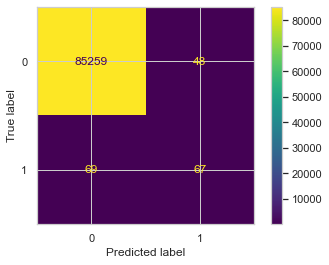

In [33]:

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

# predictions_1 = model_1.predict(X_test)
# Accuracy_1 = accuracy_score(y_test, predictions_1)
# print(f'Accuracy_1: {Accuracy_1}')

report_1 = classification_report(y_test, predictions_1)
print('Classification Report_1:\n', report_1)


predictions_1 = model_1.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions_1)
print('Confusion Matrix:')
print(conf_matrix)


disp = ConfusionMatrixDisplay(confusion_matrix = conf_matrix)
disp.plot()
plt.savefig('conf_matrix.png')
plt.show()



### SVM

* [SVM practical example](https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/)

SVM Report_2:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
[[85307     0]
 [  136     0]]


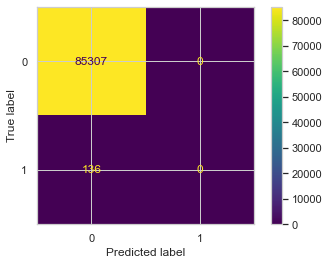

In [39]:
# Create the SVM model
model_2 = SVC()

# Train the model with the training data
model_2.fit(X_train, y_train)

# Predict the test data
predictions_2 = model_2.predict(X_test)

# Calculate accuracy
# Accuracy_2 = accuracy_score(y_test, predictions_2)
# print(f'Accuracy_2: {Accuracy_2}')

# Generate classification report
report_2 = classification_report(y_test, predictions_2)
print('SVM Report_2:\n', report_2)

# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_2)
print('Confusion Matrix:')
print(conf_matrix)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()

# Save and display the confusion matrix
plt.savefig('conf_matrix.png')
plt.show()


## Student Questions

1. Compare the SVM vs Logistic Regression model? Generally which one was better?

The choice between SVM and logistic regression depends on the type of data and the specific problem. SVM performs better when the data is not linearly separable, as it can generate more complex decision boundaries using kernel tricks. Logistic regression is suitable for data that is linearly separable and provides probabilistic outputs to determine which model is better in this particular case, according to their performance criteria on the logistic data!

2. Is accuracy a suitable metric for evaluating performance in this problem? Explain your rationale.

No, our data is unbalanced, not a good measure, i.e. one class is significantly more than the other. In such cases, accuracy can be misleading because a model that predicts the majority class well will still have high accuracy even if it performs poorly in predicting the minority class. Measures such as Precision, Recall, F1-Score or AUC-ROC can provide a more balanced assessment of model performance.

3. If achieving high recall is crucial for our problem, what recommendations do you have to enhance this metric specifically for this dataset?

Adjust the decision threshold: Lower the threshold you set for predicting a positive class to increase Recall, although Precision may decrease.
Using class weighting: In the SVM or logistic regression model, give more weight to the minority class so that the model pays more attention to it.
Use resampling techniques: Use methods such as Minority Class Oversampling (like SMOTE) or Majority Class Undersampling to balance the dataset.
Model selection: Consider models such as Random Forest or Boosting algorithms, which often cope well with class imbalance and may have higher recall.
Ensemble methods: combining several models can help better identify the minority class and improve recall

  **. Answer**  

# Unsupervised Image Segmentation using Clustering!

Image segmentation is a crucial step in image processing and is essential for analyzing image contents. For instance, to determine if an indoor image contains a chair or a person, image segmentation can be used to isolate and examine each object individually. It typically precedes tasks like pattern recognition, feature extraction, and image compression.

Image segmentation involves classifying an image into various groups. Extensive research has been conducted in this field, particularly using clustering techniques. Among these, the K-Means clustering algorithm is one of the most widely used methods.

The process of image segmentation transforms an image into a set of pixel regions, represented by a mask or a labeled image. This segmentation allows for the targeted processing of significant image segments rather than the entire image.

In this section we want to demonstrate K-Mean able to cluster similar pixel properly. and finaly segment components of an image!

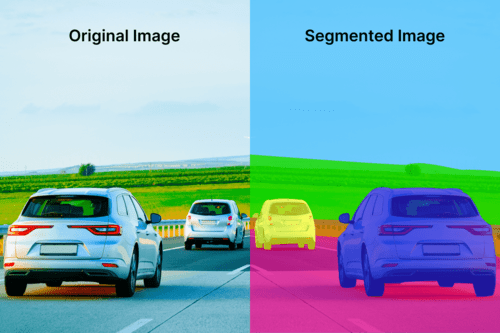

## Load Data

In [40]:
warnings.filterwarnings("ignore")

In [ ]:
# Image Link (You can download and upload it): https://drive.google.com/file/d/16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb/view?usp=sharing
!gdown 16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb

Downloading...
From: https://drive.google.com/uc?id=16iMaYEGH-GgmqZfrCTw2vjYayllcgFcb
To: /content/elephant.jpg
100% 36.2k/36.2k [00:00<00:00, 66.7MB/s]


In [41]:
im =  cv2.imread('./elephant.jpg') # Reads an image into BGR Format
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(330, 500, 3)


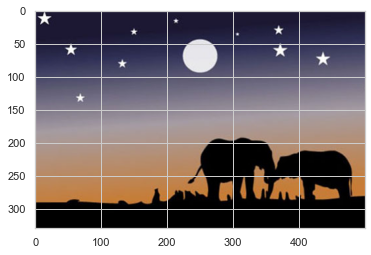

In [42]:
plt.imshow(im) # as RGB Format
plt.show()

In [43]:
# Flatten Each channel of the Image
all_pixels  = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


## Number of Dominant Colors in Image

The optimal number of clusters when clustering all pixels represents the predominant colors in an image.








In [ ]:
# Load and convert the image
original_shape = im.shape
print("Original Shape:", im.shape)

# Reshape the image into a 2D array
pixels = im.reshape(-1, 3)

# Define a range of K values to test
K = range(2, 11)

# Variables to store results
wcss = []
silhouette_scores = []

# Iterate over different K values to calculate WCSS and Silhouette Scores
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pixels)
    
    # Calculate WCSS (for Elbow Method)
    wcss.append(kmeans.inertia_)
    
    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(pixels, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot WCSS for Elbow Method
plt.figure(figsize=(12, 6))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal K')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(12, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Optimal K')
plt.show()



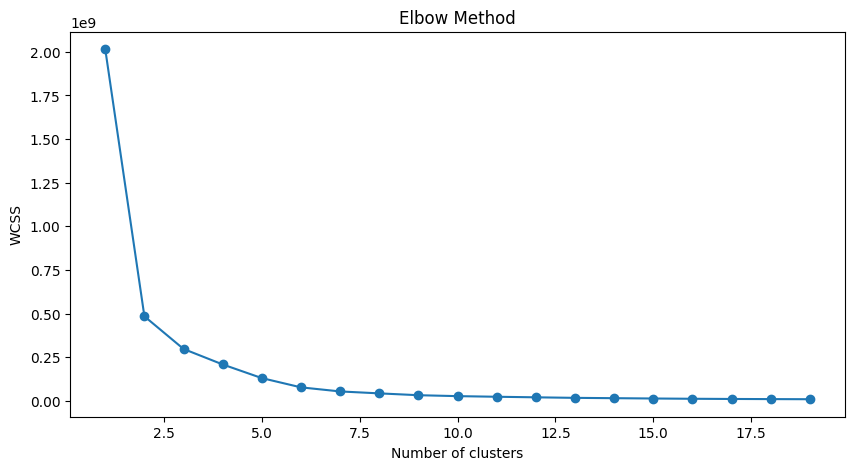

## Visualize Dominant Color

In [51]:
# Reshape the image into a 2D array where each row represents a pixel's RGB values
all_pixels = im.reshape(-1, 3)

# Determine the optimal number of clusters (replace with actual value)
optimal_k = 5  # Example value, replace with your actual number of clusters

# Initialize the KMeans model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the model to the pixel data
kmeans.fit(all_pixels)

# Get the dominant colors (cluster centers)
dominant_colors = kmeans.cluster_centers_

# Predict the cluster for each pixel
pixel_clusters = kmeans.predict(all_pixels)

# Reshape the clustered pixels to the original image shape
clustered_image = pixel_clusters.reshape(original_shape[:2])

# Create an image where each pixel is replaced by its corresponding dominant color
dominant_image = dominant_colors[pixel_clusters].reshape(original_shape).astype(int)



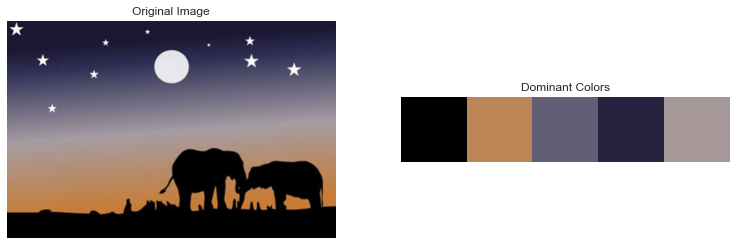

In [53]:
# Visualize the original image, dominant colors, and the image with dominant colors
plt.figure(figsize=(20, 8))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(im)
plt.title("Original Image")
plt.axis('off')

# Dominant Colors (Visualized as patches)
plt.subplot(1, 3, 2)
plt.imshow([dominant_colors.astype(int)])
plt.title("Dominant Colors")
plt.axis('off')

plt.show()


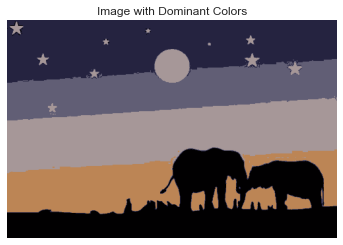

In [58]:
# Image with Dominant Colors
plt.subplot(1, 1, 1)
plt.imshow(dominant_image)
plt.title("Image with Dominant Colors")
plt.axis('off')

plt.show()


## Segmenting original image

In [ ]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


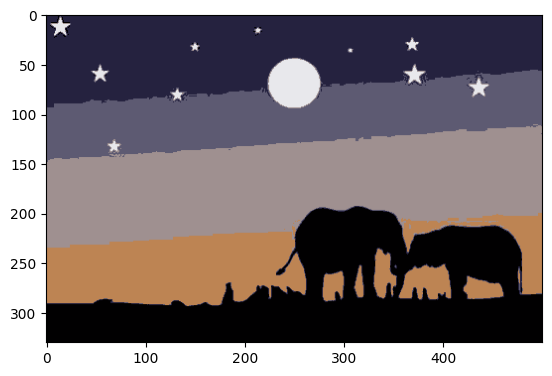

In [ ]:
colors = kmeans.cluster_centers_
lables = kmeans.labels_

# Iterate over the image
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[lables[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()